In [28]:
# Basic Libs..
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
print('CWD is ',os.getcwd())
import cv2
# Vis Libs..
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import os
from tqdm import tqdm_notebook

#
from utility import load_data, plot_classes,visualize_imgs, circle_crop, display_samples
from clearml import Task, TaskTypes

CWD is  /home/abhijitbarman/abhijit/WS/PHM/retinopathy_detection/src


In [18]:
task = Task.init(project_name='Diabetic_Retinopathy_Detection', 
                 task_name='EDA_Diabetic_Retinopathy_Detection', 
                 task_type=TaskTypes.data_processing,
                 reuse_last_task_id=True
                 )

Could not read Jupyter Notebook: No module named 'nbconvert'


ClearML Task: overwriting (reusing) task id=944cb911d6eb4d1aba404d87eda971db
ClearML results page: http://3.111.229.37:8080/projects/d6bbb840a1ea40f0b682638dc88c44dd/experiments/944cb911d6eb4d1aba404d87eda971db/output/log


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3662, 4) (1928, 3) 



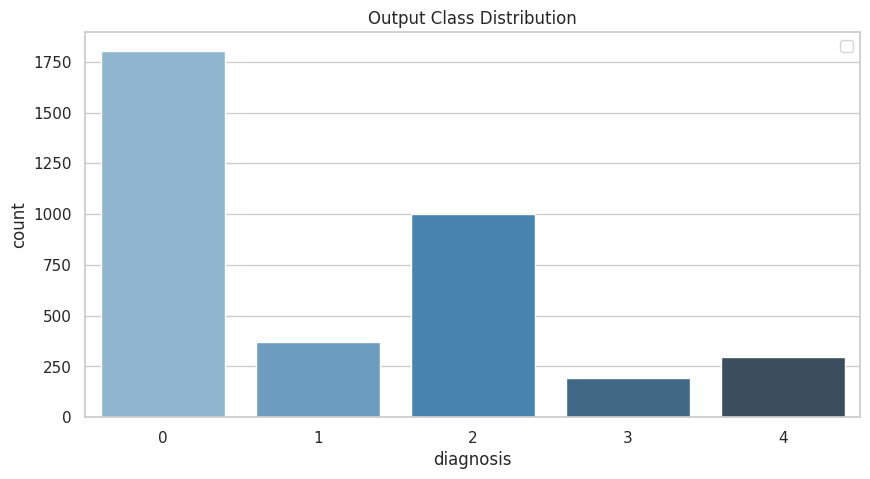

In [19]:
IMG_SIZE = 224
df_train,df_test = load_data('')
print(df_train.shape,df_test.shape,'\n')
plot_classes(df_train)

ClearML results page: http://3.111.229.37:8080/projects/d6bbb840a1ea40f0b682638dc88c44dd/experiments/944cb911d6eb4d1aba404d87eda971db/output/log
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


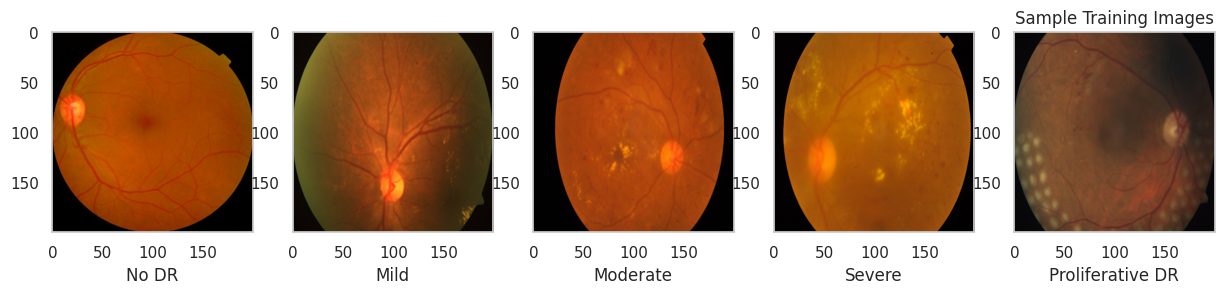

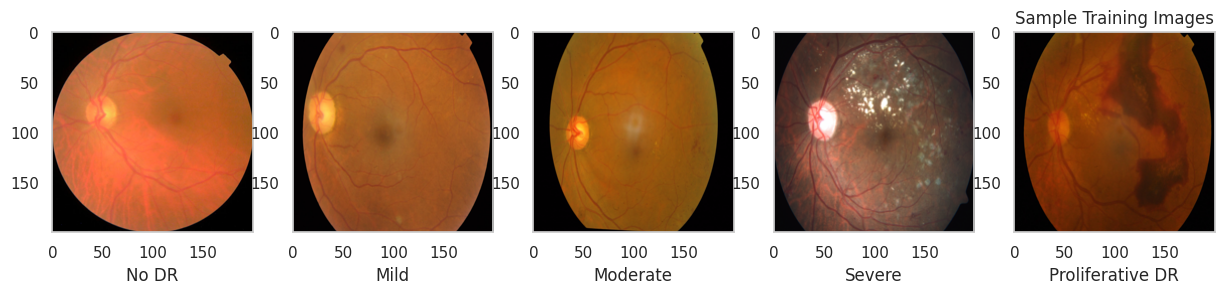

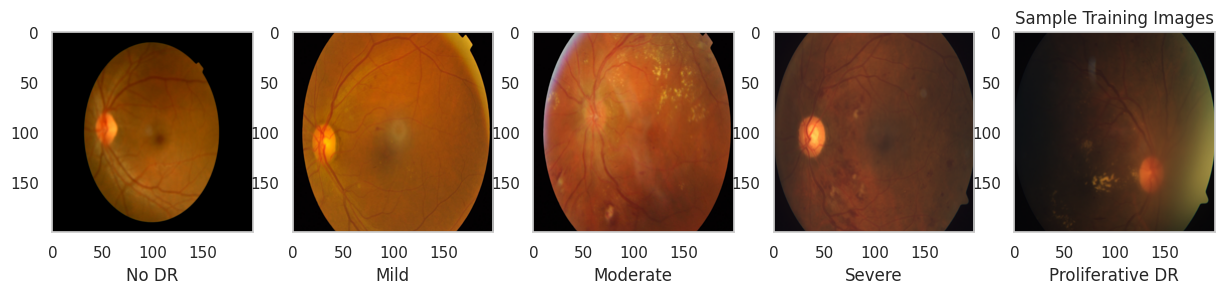

In [20]:
visualize_imgs(df_train,3,color_scale = None)

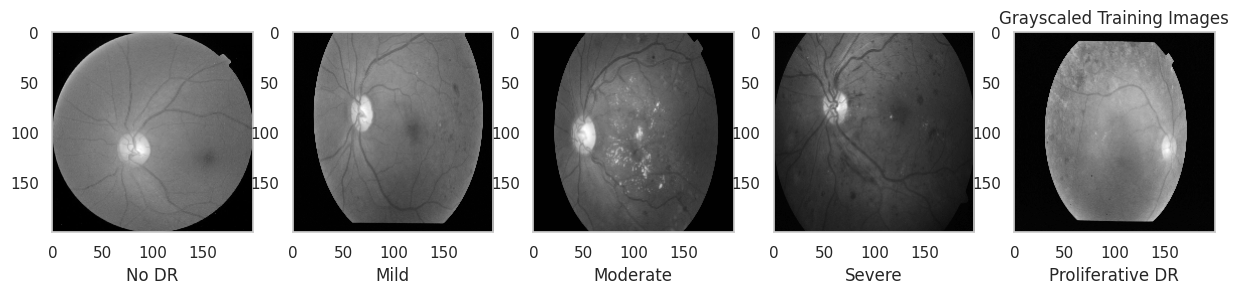

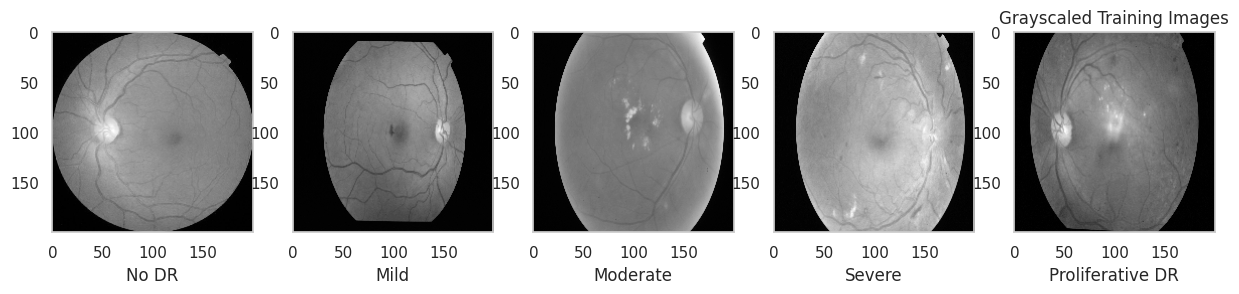

In [21]:
visualize_imgs(df_train,2,color_scale = 'gray',title='Grayscaled Training Images')

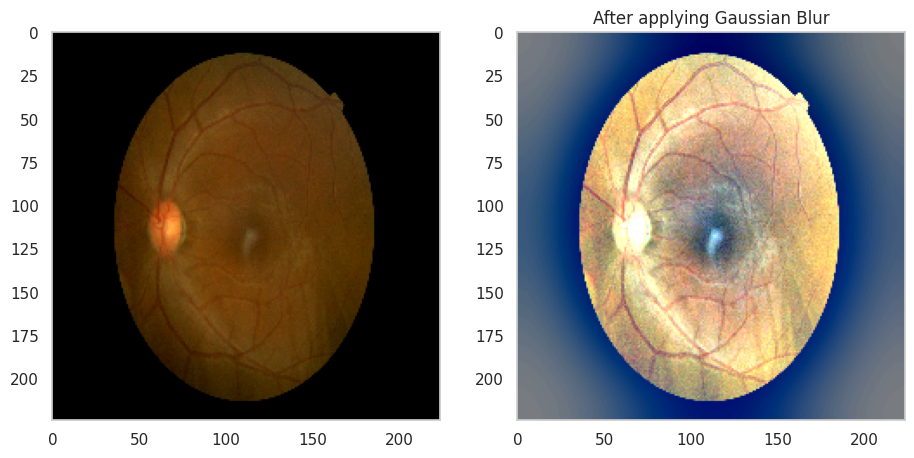

In [22]:
'''
This section of code applies gaussian blur on top of image
'''

rn = np.random.randint(low = 0,high = len(df_train) - 1)

img = cv2.imread(df_train.file_path.iloc[rn])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

img_t = cv2.addWeighted(img,4, cv2.GaussianBlur(img , (0,0) , 30) ,-4 ,128)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(img)
axarr[1].imshow(img_t)
plt.title('After applying Gaussian Blur')
plt.show()


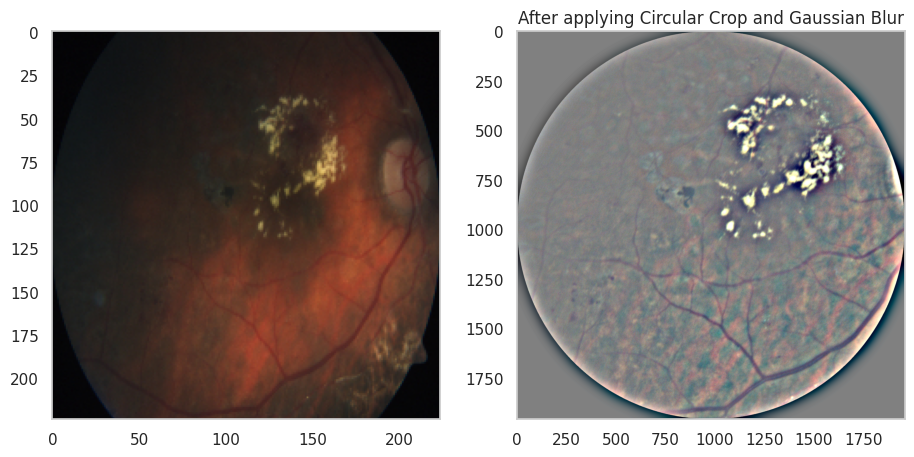

In [26]:

'''Perform Image Processing on a sample image'''

rn = np.random.randint(low = 0,high = len(df_train) - 1)

#img = img_t
img = cv2.imread(df_train.file_path.iloc[rn])
img_t = circle_crop(img,sigmaX = 30)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(IMG_SIZE,IMG_SIZE)))
axarr[1].imshow(img_t)
plt.title('After applying Circular Crop and Gaussian Blur')
plt.show()


In [31]:
# train image data
npix = 224 # resize to npix x npix (for now)
X_train = np.zeros((df_train.shape[0], npix, npix))
#for i in tqdm_notebook(range(df_train.shape[0])):
for i in range(df_train.shape[0]):
    # load an image
    img = cv2.imread(df_train.file_path.iloc[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    X_train[i, :, :] = cv2.resize(img, (npix, npix)) 
    
print("X_train shape: " + str(np.shape(X_train))) 

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [24]:
task.close()